In [1]:
# establish a connection with coingGecko API and fetch live prices for BTC and Ethereum

#fetch the top 10 cryptos by market cap
#fetch the top 10 cryptos by volume in last 24 hours

#fetch  historical crypto prices for BTC and Ethereum
# get live crypto prices for the top 5 crypto currencies

#calculate teh volume, volatility, market cap of various coins and pick the top 5 + 5 other outliers above a certain market cap
# fetch last 3 months historic data for ehteremum 
# charts for the above

# run a simple moving average trading algo on ethereum on last 3 months data
#calcualte the returns of the above strategy
#compare it with overall returns that ETH would have given anyways 



# these are for later 
# repeat the above for 5 years of daily data 
# repeat the above for BTC
# moudlarise the above and run on 3 more currencies: possibly MATIC, RIPPLE, Algorand, etc. 

# for much later
# visualise the strategy on a chart 

CoinGecko API docs are here https://www.coingecko.com/en/api/documentation

- Connect to pycoingecko, pandas and other libs needed
- I have created a vritual environment for this project
- I have also played around in postman in the coingecko collection to see how the API behaves

In [10]:
import pandas as pd
import json 
import seaborn as sns

In [2]:
from pycoingecko import CoinGeckoAPI # API docs are here: https://www.coingecko.com/en/api/documentation 
cg = CoinGeckoAPI()

### Establish a connection with coingGecko API and fetch live prices for BTC and Ethereum

In [21]:
cg.get_price(ids=['bitcoin','ethereum'], vs_currencies='usd')

{'bitcoin': {'usd': 21263}, 'ethereum': {'usd': 1634.38}}

### Fetch the top 10 cryptos by market cap

In [23]:
cg.get_coins_markets(vs_currency='usd') # get market data in USD 

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 21262,
  'market_cap': 406867622856,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 446715005519,
  'total_volume': 30013321178,
  'high_24h': 21581,
  'low_24h': 20849,
  'price_change_24h': -256.83369013990523,
  'price_change_percentage_24h': -1.19353,
  'market_cap_change_24h': -5162045311.277222,
  'market_cap_change_percentage_24h': -1.25283,
  'circulating_supply': 19126781.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 69045,
  'ath_change_percentage': -69.29017,
  'ath_date': '2021-11-10T14:24:11.849Z',
  'atl': 67.81,
  'atl_change_percentage': 31169.49455,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2022-08-20T11:18:58.353Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/eth

In [53]:
current_market_data = pd.DataFrame(cg.get_coins_markets(vs_currency='usd')) # get the json into a pd dataframe


In [28]:
# explore the data frame
current_market_data.shape

(100, 26)

In [44]:
current_market_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,bitcoin,ethereum,tether,usd-coin,binancecoin,binance-usd,ripple,cardano,solana,dogecoin
symbol,btc,eth,usdt,usdc,bnb,busd,xrp,ada,sol,doge
name,Bitcoin,Ethereum,Tether,USD Coin,BNB,Binance USD,XRP,Cardano,Solana,Dogecoin
image,https://assets.coingecko.com/coins/images/1/la...,https://assets.coingecko.com/coins/images/279/...,https://assets.coingecko.com/coins/images/325/...,https://assets.coingecko.com/coins/images/6319...,https://assets.coingecko.com/coins/images/825/...,https://assets.coingecko.com/coins/images/9576...,https://assets.coingecko.com/coins/images/44/l...,https://assets.coingecko.com/coins/images/975/...,https://assets.coingecko.com/coins/images/4128...,https://assets.coingecko.com/coins/images/5/la...
current_price,21275.0,1637.43,1.002,1.001,288.43,1.002,0.343287,0.461743,36.78,0.0704
market_cap,406788281964,196625140237,67657236142,52476077977,47049292167,18853621069,16946809903,15612399885,12822357197,9331505090
market_cap_rank,1,2,3,4,5,6,7,8,9,10
fully_diluted_valuation,446627894220.0,NaN,NaN,NaN,47579437949.0,NaN,34320854158.0,20773286248.0,NaN,NaN
total_volume,29987550725.0,19977950075.0,54487461938.0,6245764588.0,1402094175.0,5939457918.0,1177614978.0,856421944.0,1287310968.0,727627417.0
high_24h,21581.0,1725.76,1.004,1.007,288.62,1.004,0.343899,0.474217,37.73,0.071211


In [ ]:
#columns we are interested in 
#"symbol", "name","current_price","market_cap","total_volume", "ath","ath_change_percentage"
## what is volume? how to read candlestick chart? what are top indicatros that traders use to predict direction/momentum?

In [33]:
current_market_data.columns

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated'],
      dtype='object')

In [34]:
current_market_data.dtypes

id                                   object
symbol                               object
name                                 object
image                                object
current_price                       float64
market_cap                            int64
market_cap_rank                       int64
fully_diluted_valuation             float64
total_volume                        float64
high_24h                            float64
low_24h                             float64
price_change_24h                    float64
price_change_percentage_24h         float64
market_cap_change_24h               float64
market_cap_change_percentage_24h    float64
circulating_supply                  float64
total_supply                        float64
max_supply                          float64
ath                                 float64
ath_change_percentage               float64
ath_date                             object
atl                                 float64
atl_change_percentage           

In [37]:
current_market_data.describe()

,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
count,1.000000e+02,1.000000e+02,100.000000,5.900000e+01,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,1.000000e+02,100.000000,1.000000e+02,9.300000e+01,5.900000e+01,100.000000,100.000000,1.000000e+02,1.000000e+02
mean,7.124817e+02,1.007132e+10,50.510000,1.227835e+10,1.354415e+09,7.232450e+02,6.975842e+02,-7.550368,0.226225,-1.320500e+08,0.372122,1.546814e+13,2.163401e+13,1.714493e+13,3410.264556,-75.936374,1.669677e+02,2.523608e+05
std,3.645382e+03,4.553686e+10,29.028894,5.807016e+10,6.491168e+09,3.693713e+03,3.568230e+03,40.571657,2.559714,1.117674e+09,2.529633,1.102138e+14,1.451010e+14,1.288676e+14,19153.255020,22.425385,1.167501e+03,2.362657e+06
min,8.852310e-07,4.409961e+08,1.000000,4.910816e+08,2.335000e+01,9.069710e-07,8.685140e-07,-284.104493,-11.167430,-1.004787e+10,-9.248160,3.897049e+04,3.897049e+04,3.897049e+04,0.000003,-99.061860,5.636600e-11,5.564650e+00
25%,4.462525e-01,6.543491e+08,25.750000,8.787004e+08,1.568091e+07,4.589135e-01,4.363407e-01,-0.018009,-0.885652,-1.286163e+07,-0.895482,1.151302e+08,1.452846e+08,1.788697e+08,2.365000,-89.921790,3.333421e-02,1.719220e+02
50%,2.055000e+00,1.182473e+09,50.500000,1.935836e+09,6.037971e+07,2.200000e+00,1.975000e+00,0.000801,0.284860,6.630341e+06,0.545005,5.662285e+08,1.000000e+09,1.000000e+09,10.185000,-85.099820,2.929625e-01,7.218203e+02
75%,1.958500e+01,3.267455e+09,75.250000,5.243088e+09,3.220701e+08,2.006250e+01,1.910750e+01,0.022044,1.617610,2.043123e+07,1.932972,3.576041e+09,7.314446e+09,6.312939e+09,165.447500,-69.718285,1.052500e+00,4.046677e+03
max,2.127500e+04,4.067883e+11,101.000000,4.466279e+11,5.448746e+10,2.158400e+04,2.086600e+04,6.700000,6.340020,1.036851e+09,6.363580,9.374185e+14,9.999912e+14,9.900000e+14,166135.000000,-2.861960,1.120902e+04,2.362873e+07


In [81]:
current_market_data.sort_values(by="market_cap", ascending=False)[0:5] # grab the top 5 cyptos by market cap

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,21312.000,407912085996,1,4.478586e+11,2.707625e+10,21581.000,...,2.100000e+07,21000000.0,69045.00,-69.11193,2021-11-10T14:24:11.849Z,67.810000,31350.98398,2013-07-06T00:00:00.000Z,None,2022-08-20T14:27:14.864Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1637.480,197274901038,2,NaN,1.764593e+10,1725.760,...,1.201758e+08,NaN,4878.26,-66.34962,2021-11-10T14:24:19.604Z,0.432979,379030.11711,2015-10-20T00:00:00.000Z,"{'times': 101.709795749845, 'currency': 'btc',...",2022-08-20T14:27:16.659Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.000,67623881944,3,NaN,5.019177e+10,1.004,...,6.754956e+10,NaN,1.32,-24.33650,2018-07-24T00:00:00.000Z,0.572521,74.85825,2015-03-02T00:00:00.000Z,None,2022-08-20T14:25:34.481Z
3,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1.001,52451620164,4,NaN,5.755543e+09,1.007,...,5.243758e+10,NaN,1.17,-14.68807,2019-05-08T00:40:28.300Z,0.891848,12.17812,2021-05-19T13:14:05.611Z,None,2022-08-20T14:27:09.578Z
4,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,287.330,46995528730,5,4.752507e+10,1.192600e+09,288.620,...,1.632770e+08,165116760.0,686.31,-58.06145,2021-05-10T07:24:17.097Z,0.039818,722762.10131,2017-10-19T00:00:00.000Z,None,2022-08-20T14:26:43.933Z


In [56]:
top_crypto_mcap = current_market_data.sort_values(by="market_cap", ascending=False).loc[0:10,["symbol", "name","current_price","market_cap","total_volume", "ath","ath_change_percentage"]] # grab the top 5 cyptos by market cap
top_crypto_mcap # TOP 10 CRYTPOS BY MARKET CAP

,symbol,name,current_price,market_cap,total_volume,ath,ath_change_percentage
0,btc,Bitcoin,21312.000000,407912085996,2.707625e+10,69045.000000,-69.11193
1,eth,Ethereum,1637.480000,197274901038,1.764593e+10,4878.260000,-66.34962
2,usdt,Tether,1.000000,67623881944,5.019177e+10,1.320000,-24.33650
3,usdc,USD Coin,1.001000,52451620164,5.755543e+09,1.170000,-14.68807
4,bnb,BNB,287.330000,46995528730,1.192600e+09,686.310000,-58.06145
5,busd,Binance USD,1.000000,18825702665,5.242657e+09,1.150000,-13.33307
6,xrp,XRP,0.342200,16928058455,1.022490e+09,3.400000,-89.91220
7,ada,Cardano,0.457959,15537617124,7.741123e+08,3.090000,-85.11725
8,sol,Solana,36.640000,12829840899,1.218733e+09,259.960000,-85.86463
9,doge,Dogecoin,0.070237,9339630273,6.582503e+08,0.731578,-90.37737


### Fetch the top 10 cryptos by volume traded last 24 hours 

In [82]:
top_crypto_vol = current_market_data.sort_values(by="total_volume", ascending=False).reset_index(drop=True).loc[0:10,["symbol", "name","current_price","market_cap","total_volume", "ath","ath_change_percentage"]]


In [83]:
top_crypto_vol  # TOP CRYPTOS BY VOL TRADED IN LAST 24 HOURS 

,symbol,name,current_price,market_cap,total_volume,ath,ath_change_percentage
0,usdt,Tether,1.000000,67623881944,5.019177e+10,1.320000,-24.33650
1,btc,Bitcoin,21312.000000,407912085996,2.707625e+10,69045.000000,-69.11193
2,eth,Ethereum,1637.480000,197274901038,1.764593e+10,4878.260000,-66.34962
3,usdc,USD Coin,1.001000,52451620164,5.755543e+09,1.170000,-14.68807
4,busd,Binance USD,1.000000,18825702665,5.242657e+09,1.150000,-13.33307
5,etc,Ethereum Classic,34.270000,4687919870,1.413839e+09,167.090000,-79.43858
6,sol,Solana,36.640000,12829840899,1.218733e+09,259.960000,-85.86463
7,bnb,BNB,287.330000,46995528730,1.192600e+09,686.310000,-58.06145
8,xrp,XRP,0.342200,16928058455,1.022490e+09,3.400000,-89.91220
9,shib,Shiba Inu,0.000013,7854663831,9.211699e+08,0.000086,-84.55369


### Fetch  historical crypto prices for BTC and Ethereum


In [ ]:
# GETTING BTC HISToRIcAL PRICES

In [179]:
btc_historical_prices_json= cg.get_coin_market_chart_by_id(id="bitcoin", vs_currency="usd",days="90", interval="daily")

In [180]:
btc_historical_prices_json

{'prices': [[1653350400000, 29163.167775739188],
  [1653436800000, 29655.02613175249],
  [1653523200000, 29584.949851985926],
  [1653609600000, 29346.781442431617],
  [1653696000000, 28646.65218193245],
  [1653782400000, 29088.236452817226],
  [1653868800000, 29492.503214953642],
  [1653955200000, 31740.94072516695],
  [1654041600000, 31865.749621173167],
  [1654128000000, 29833.450330205254],
  [1654214400000, 30481.013996026013],
  [1654300800000, 29714.143487149733],
  [1654387200000, 29872.3603087139],
  [1654473600000, 29917.764052456198],
  [1654560000000, 31372.5847629755],
  [1654646400000, 31265.469277693348],
  [1654732800000, 30229.236836130378],
  [1654819200000, 30101.187521431468],
  [1654905600000, 29101.2982596468],
  [1654992000000, 28374.14499732395],
  [1655078400000, 26767.269173221313],
  [1655164800000, 22525.768350391198],
  [1655251200000, 22244.848968001315],
  [1655337600000, 22529.198114649807],
  [1655424000000, 20408.690490591813],
  [1655510400000, 20473.0

In [183]:
btc_historical_prices=pd.DataFrame(btc_historical_prices_json['prices'], columns =['date','price']).merge(
    pd.DataFrame(btc_historical_prices_json['market_caps'], columns =['date','market_cap']), on="date").merge(
    pd.DataFrame(btc_historical_prices_json['total_volumes'], columns =['date','volume']), on="date")

In [184]:
btc_historical_prices

,date,price,market_cap,volume
0,1653350400000,29163.167776,5.554594e+11,2.664675e+10
1,1653436800000,29655.026132,5.648852e+11,2.348644e+10
2,1653523200000,29584.949852,5.635770e+11,2.310876e+10
3,1653609600000,29346.781442,5.590661e+11,3.197204e+10
4,1653696000000,28646.652182,5.457529e+11,3.175631e+10
...,...,...,...,...
86,1660780800000,23359.418837,4.470158e+11,2.956740e+10
87,1660867200000,23248.384228,4.448460e+11,2.022821e+10
88,1660953600000,20945.833966,4.008104e+11,3.514241e+10
89,1661040000000,21175.232733,4.049249e+11,2.380968e+10


In [185]:
btc_historical_prices['coin']=["btc"]*len(btc_historical_prices.index)

In [186]:
btc_historical_prices

,date,price,market_cap,volume,coin
0,1653350400000,29163.167776,5.554594e+11,2.664675e+10,btc
1,1653436800000,29655.026132,5.648852e+11,2.348644e+10,btc
2,1653523200000,29584.949852,5.635770e+11,2.310876e+10,btc
3,1653609600000,29346.781442,5.590661e+11,3.197204e+10,btc
4,1653696000000,28646.652182,5.457529e+11,3.175631e+10,btc
...,...,...,...,...,...
86,1660780800000,23359.418837,4.470158e+11,2.956740e+10,btc
87,1660867200000,23248.384228,4.448460e+11,2.022821e+10,btc
88,1660953600000,20945.833966,4.008104e+11,3.514241e+10,btc
89,1661040000000,21175.232733,4.049249e+11,2.380968e+10,btc


In [187]:
eth_historical_prices_json= cg.get_coin_market_chart_by_id(id="ethereum", vs_currency="usd",days="90", interval="daily")

In [188]:
eth_historical_prices_json

{'prices': [[1653350400000, 1974.5811944790914],
  [1653436800000, 1979.770545006472],
  [1653523200000, 1944.8428445072448],
  [1653609600000, 1807.9694742881136],
  [1653696000000, 1724.8757340323443],
  [1653782400000, 1798.6948545788846],
  [1653868800000, 1814.9831598025937],
  [1653955200000, 1995.9364841552344],
  [1654041600000, 1944.078766836179],
  [1654128000000, 1828.8926546074292],
  [1654214400000, 1833.089840845753],
  [1654300800000, 1776.979907458187],
  [1654387200000, 1804.2616695112486],
  [1654473600000, 1805.3313949894373],
  [1654560000000, 1860.1813068416047],
  [1654646400000, 1818.3877119829308],
  [1654732800000, 1794.539625671828],
  [1654819200000, 1788.4182866616045],
  [1654905600000, 1663.844367412088],
  [1654992000000, 1530.0386174317211],
  [1655078400000, 1454.6867601728409],
  [1655164800000, 1205.5952855404787],
  [1655251200000, 1214.8662649132034],
  [1655337600000, 1230.3643353556051],
  [1655424000000, 1068.6035748646073],
  [1655510400000, 108

In [189]:
eth_historical_prices=pd.DataFrame(eth_historical_prices_json['prices'], columns =['date','price']).merge(
    pd.DataFrame(eth_historical_prices_json['market_caps'], columns =['date','market_cap']), on="date").merge(
    pd.DataFrame(eth_historical_prices_json['total_volumes'], columns =['date','volume']), on="date")

In [190]:
eth_historical_prices

,date,price,market_cap,volume
0,1653350400000,1974.581194,2.387228e+11,1.462731e+10
1,1653436800000,1979.770545,2.393754e+11,1.288048e+10
2,1653523200000,1944.842845,2.353477e+11,1.255461e+10
3,1653609600000,1807.969474,2.192473e+11,2.266935e+10
4,1653696000000,1724.875734,2.086229e+11,2.434454e+10
...,...,...,...,...
86,1660780800000,1834.826453,2.206659e+11,1.842755e+10
87,1660867200000,1850.111291,2.226524e+11,1.336378e+10
88,1660953600000,1618.532504,1.948177e+11,2.268736e+10
89,1661040000000,1579.415723,1.896211e+11,1.640451e+10


In [191]:
eth_historical_prices['coin']=["eth"]*len(eth_historical_prices.index)

In [192]:
eth_historical_prices

,date,price,market_cap,volume,coin
0,1653350400000,1974.581194,2.387228e+11,1.462731e+10,eth
1,1653436800000,1979.770545,2.393754e+11,1.288048e+10,eth
2,1653523200000,1944.842845,2.353477e+11,1.255461e+10,eth
3,1653609600000,1807.969474,2.192473e+11,2.266935e+10,eth
4,1653696000000,1724.875734,2.086229e+11,2.434454e+10,eth
...,...,...,...,...,...
86,1660780800000,1834.826453,2.206659e+11,1.842755e+10,eth
87,1660867200000,1850.111291,2.226524e+11,1.336378e+10,eth
88,1660953600000,1618.532504,1.948177e+11,2.268736e+10,eth
89,1661040000000,1579.415723,1.896211e+11,1.640451e+10,eth


In [ ]:
# COMBINING THE PRICE DATA

In [196]:
# appendix the 2 price data frames source: https://pandas.pydata.org/docs/user_guide/merging.html
btc_eth_historical_prices = pd.concat([btc_historical_prices,eth_historical_prices]).reset_index(drop=True)

In [197]:
btc_eth_historical_prices

,date,price,market_cap,volume,coin
0,1653350400000,29163.167776,5.554594e+11,2.664675e+10,btc
1,1653436800000,29655.026132,5.648852e+11,2.348644e+10,btc
2,1653523200000,29584.949852,5.635770e+11,2.310876e+10,btc
3,1653609600000,29346.781442,5.590661e+11,3.197204e+10,btc
4,1653696000000,28646.652182,5.457529e+11,3.175631e+10,btc
...,...,...,...,...,...
177,1660780800000,1834.826453,2.206659e+11,1.842755e+10,eth
178,1660867200000,1850.111291,2.226524e+11,1.336378e+10,eth
179,1660953600000,1618.532504,1.948177e+11,2.268736e+10,eth
180,1661040000000,1579.415723,1.896211e+11,1.640451e+10,eth


In [198]:
# convert unix ms timestamp to date from https://stackoverflow.com/questions/19231871/convert-unix-time-to-readable-date-in-pandas-dataframe 
btc_eth_historical_prices['date']=pd.to_datetime(btc_eth_historical_prices['date'],unit='ms')

In [199]:
btc_eth_historical_prices

,date,price,market_cap,volume,coin
0,2022-05-24 00:00:00,29163.167776,5.554594e+11,2.664675e+10,btc
1,2022-05-25 00:00:00,29655.026132,5.648852e+11,2.348644e+10,btc
2,2022-05-26 00:00:00,29584.949852,5.635770e+11,2.310876e+10,btc
3,2022-05-27 00:00:00,29346.781442,5.590661e+11,3.197204e+10,btc
4,2022-05-28 00:00:00,28646.652182,5.457529e+11,3.175631e+10,btc
...,...,...,...,...,...
177,2022-08-18 00:00:00,1834.826453,2.206659e+11,1.842755e+10,eth
178,2022-08-19 00:00:00,1850.111291,2.226524e+11,1.336378e+10,eth
179,2022-08-20 00:00:00,1618.532504,1.948177e+11,2.268736e+10,eth
180,2022-08-21 00:00:00,1579.415723,1.896211e+11,1.640451e+10,eth


In [168]:
sns.set_theme(style="white")

In [206]:
# setting the plot to be bigger. source: https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
sns.set(rc={'figure.figsize':(15,8)})

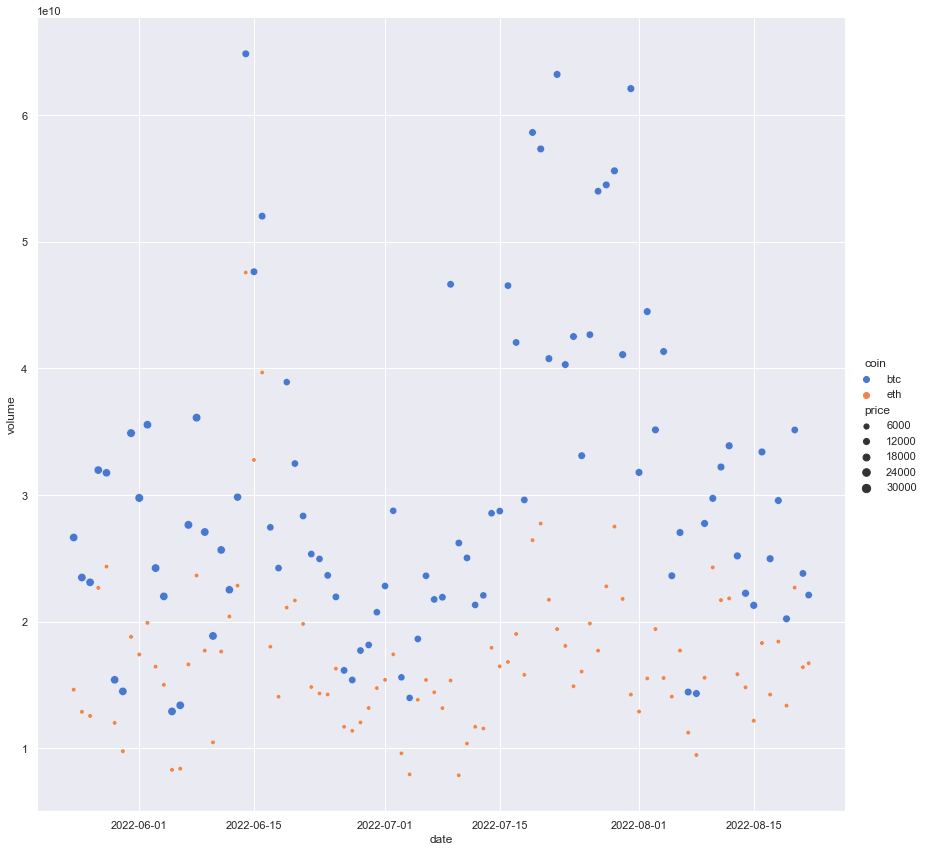

In [207]:
#BUBBLE PLOT
# from https://seaborn.pydata.org/examples/scatter_bubbles.html
sns.relplot(x='date',y='volume',hue='coin',size='price',palette='muted',height=12, data=btc_eth_historical_prices)

In [ ]:

#LINE PLOT

<AxesSubplot:xlabel='date', ylabel='volume'>

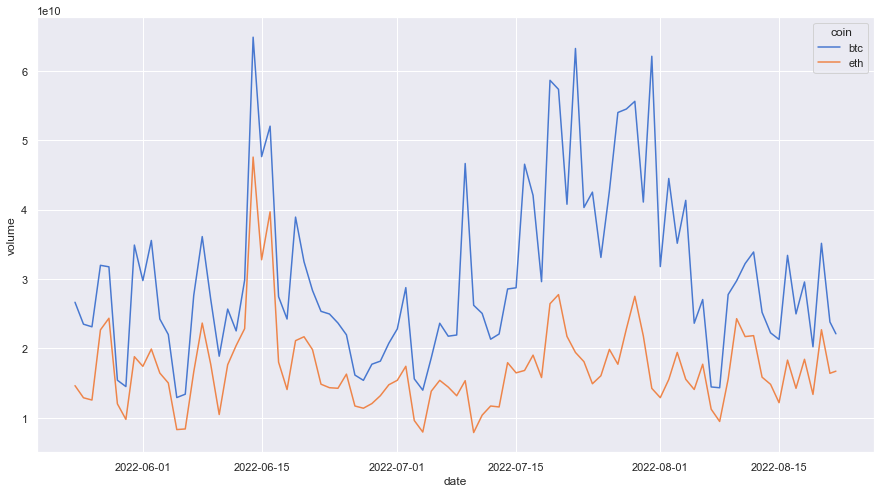

In [208]:
sns.lineplot(x='date',y='volume',hue='coin',palette='muted', data=btc_eth_historical_prices)

<AxesSubplot:xlabel='date', ylabel='price'>

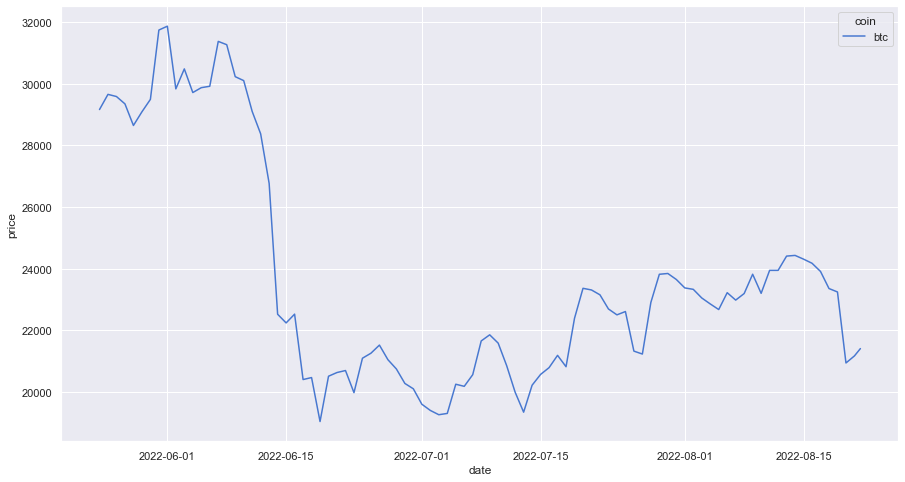

In [218]:
# filtering only on btc data source: https://towardsdatascience.com/8-ways-to-filter-pandas-dataframes-d34ba585c1b8 
sns.lineplot(x='date',y='price',hue='coin',palette='muted'
             , data=btc_eth_historical_prices[btc_eth_historical_prices.coin=='btc'])

<AxesSubplot:xlabel='date', ylabel='price'>

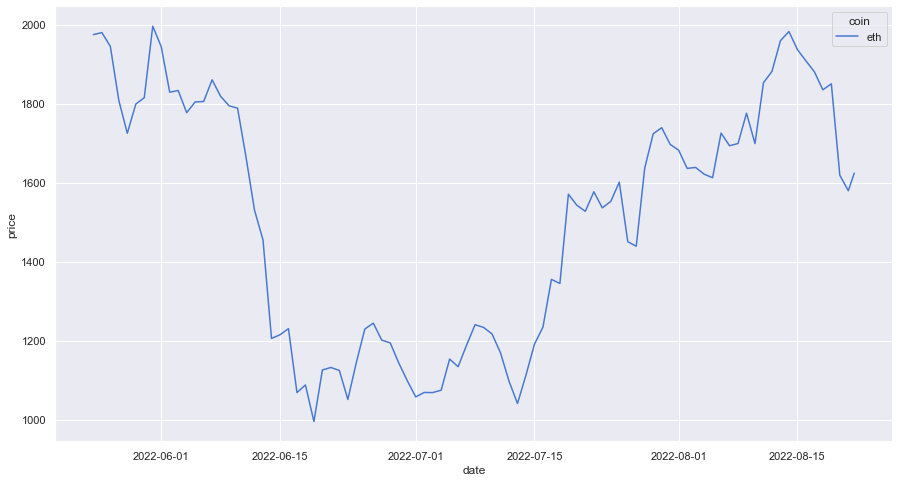

In [219]:
sns.lineplot(x='date',y='price',hue='coin',palette='muted'
             , data=btc_eth_historical_prices[btc_eth_historical_prices.coin=='eth'])

In [ ]:
# make a wide array like before and do some ratios and plotting on 2 axes adn stuff like that 

In [ ]:
# plotting with 2 different vertical axes

In [ ]:
ax=btc_eth_historical_prices.plot(x="date",y="price")

In [ ]:
# generic function to fetch historical crypto prices into a data frame 

In [ ]:
# fetch the list of cryptos i am interested in

In [ ]:
# loop through the cryptos, fetch the prices, and aggregate in a dataframe

In [ ]:
# plot them all together 

In [115]:
# grab an element in each row, put the date from the first one in a new dataframe, 
# and grab the price from the list, convert it to float, do the same for mcap and volume, build a row and append to 
# new dataframe 

### Volume trends for top 10 crypto over last 3 months 
**Plot a graph showing line charts of top 10 crypto currencies by trading volume for each day** 
1. Grab a set of cryptos that were in teh top 10 traded in the last 3 months at any time 
2. Plot their volume traded daily 
3. Let the size of the circle represent price of the asset (we will see if this is possible )

### PLAYING AROUND WITH GRAPHING (NEHAS CODE TO BE USED AS A BASE FOR FURTHER EXPLORATION)

<AxesSubplot:xlabel='symbol'>

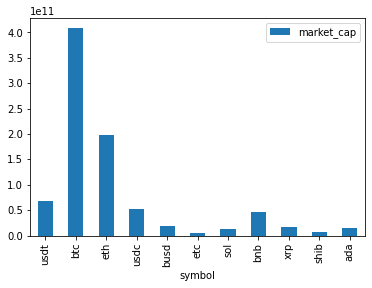

In [75]:
top_crypto_vol.plot.bar(x='symbol', y='market_cap')

<AxesSubplot:xlabel='current_price', ylabel='market_cap'>

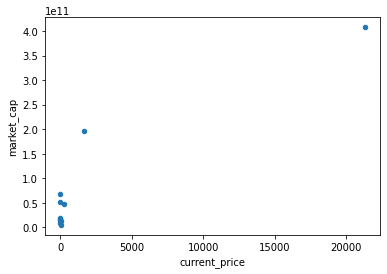

In [77]:
top_crypto_vol.plot.scatter(x='current_price', y='market_cap')

<AxesSubplot:xlabel='current_price'>

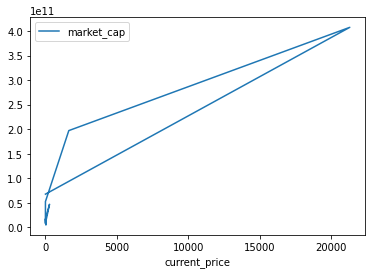

In [78]:
top_crypto_vol.plot.line(x='current_price', y='market_cap')

## Playing around with some interesting API features

### some of these would be signals for my trading algo 

### Trending on coingecko

In [107]:
cg.get_search_trending()

{'coins': [{'item': {'id': 'energy-web-token',
    'coin_id': 10886,
    'name': 'Energy Web',
    'symbol': 'EWT',
    'market_cap_rank': 182,
    'thumb': 'https://assets.coingecko.com/coins/images/10886/thumb/R9gQTJV__400x400.png?1585604557',
    'small': 'https://assets.coingecko.com/coins/images/10886/small/R9gQTJV__400x400.png?1585604557',
    'large': 'https://assets.coingecko.com/coins/images/10886/large/R9gQTJV__400x400.png?1585604557',
    'slug': 'energy-web',
    'price_btc': 0.00020373053619584413,
    'score': 0}},
  {'item': {'id': 'evmos',
    'coin_id': 24023,
    'name': 'Evmos',
    'symbol': 'EVMOS',
    'market_cap_rank': 87,
    'thumb': 'https://assets.coingecko.com/coins/images/24023/thumb/evmos.png?1653958927',
    'small': 'https://assets.coingecko.com/coins/images/24023/small/evmos.png?1653958927',
    'large': 'https://assets.coingecko.com/coins/images/24023/large/evmos.png?1653958927',
    'slug': 'evmos',
    'price_btc': 8.801551677970788e-05,
    'score'

### Exchange volumes

In [110]:
cg.get_exchanges_list()

[{'id': 'binance',
  'name': 'Binance',
  'year_established': 2017,
  'country': 'Cayman Islands',
  'description': '',
  'url': 'https://www.binance.com/',
  'image': 'https://assets.coingecko.com/markets/images/52/small/binance.jpg?1519353250',
  'has_trading_incentive': False,
  'trust_score': 10,
  'trust_score_rank': 1,
  'trade_volume_24h_btc': 581554.7481008751,
  'trade_volume_24h_btc_normalized': 581554.7481008751},
 {'id': 'gdax',
  'name': 'Coinbase Exchange',
  'year_established': 2012,
  'country': 'United States',
  'description': '',
  'url': 'https://www.coinbase.com',
  'image': 'https://assets.coingecko.com/markets/images/23/small/Coinbase_Coin_Primary.png?1621471875',
  'has_trading_incentive': False,
  'trust_score': 10,
  'trust_score_rank': 2,
  'trade_volume_24h_btc': 84181.13762879923,
  'trade_volume_24h_btc_normalized': 84181.13762879923},
 {'id': 'ftx_spot',
  'name': 'FTX',
  'year_established': 2019,
  'country': 'Antigua and Barbuda',
  'description': '',


In [111]:
cg.get_exchanges_by_id(id="binance")

{'name': 'Binance',
 'year_established': 2017,
 'country': 'Cayman Islands',
 'description': '',
 'url': 'https://www.binance.com/',
 'image': 'https://assets.coingecko.com/markets/images/52/small/binance.jpg?1519353250',
 'facebook_url': 'https://www.facebook.com/binanceexchange',
 'reddit_url': 'https://www.reddit.com/r/binance/',
 'telegram_url': '',
 'slack_url': '',
 'other_url_1': 'https://medium.com/binanceexchange',
 'other_url_2': 'https://steemit.com/@binanceexchange',
 'twitter_handle': 'binance',
 'has_trading_incentive': False,
 'centralized': True,
 'public_notice': '',
 'alert_notice': '',
 'trust_score': 10,
 'trust_score_rank': 1,
 'trade_volume_24h_btc': 581094.768144741,
 'trade_volume_24h_btc_normalized': 581094.768144741,
 'tickers': [{'base': 'BUSD',
   'target': 'USDT',
   'market': {'name': 'Binance',
    'identifier': 'binance',
    'has_trading_incentive': False},
   'last': 1.0001,
   'volume': 336368257.2714729,
   'converted_last': {'btc': 4.679e-05, 'eth':

### Defi 

In [108]:
cg.get_global_decentralized_finance_defi()

{'defi_market_cap': '43354013868.020097141724744473',
 'eth_market_cap': '194652865884.8363110995718186812',
 'defi_to_eth_ratio': '22.2724765294079475420993784781938757475466724999218522719868576',
 'trading_volume_24h': '3169056498.53481290827945465605',
 'defi_dominance': '4.0582929426778498468257924222203980248806433861827603',
 'top_coin_name': 'Lido Staked Ether',
 'top_coin_defi_dominance': 15.560542225971979}

### Public companies holding crypto (known)

In [95]:
cg.get_companies_public_treasury_by_coin_id(coin_id = "ethereum")

{'total_holdings': 80026.1,
 'total_value_usd': 130051086.61689655,
 'market_cap_dominance': 0.07,
 'companies': [{'name': 'Coinbase',
   'symbol': 'NASDAQ: COIN',
   'country': 'US',
   'total_holdings': 48880,
   'total_entry_value_usd': 165400000,
   'total_current_value_usd': 79435460,
   'percentage_of_total_supply': 0.041},
  {'name': 'Meitu',
   'symbol': 'HKG:1357',
   'country': 'HK',
   'total_holdings': 31000,
   'total_entry_value_usd': 50500000,
   'total_current_value_usd': 50378360,
   'percentage_of_total_supply': 0.026},
  {'name': 'Mogo Inc.',
   'symbol': 'NASDAQ:MOGO',
   'country': 'CA',
   'total_holdings': 146,
   'total_entry_value_usd': 405880,
   'total_current_value_usd': 237265,
   'percentage_of_total_supply': 0.0}]}

In [98]:
cg.get_companies_public_treasury_by_coin_id(coin_id = "bitcoin")

{'total_holdings': 174374.4658,
 'total_value_usd': 3738631171.3098674,
 'market_cap_dominance': 0.91,
 'companies': [{'name': 'MicroStrategy Inc.',
   'symbol': 'NASDAQ:MSTR',
   'country': 'US',
   'total_holdings': 129699,
   'total_entry_value_usd': 3975000000,
   'total_current_value_usd': 2780778263,
   'percentage_of_total_supply': 0.618},
  {'name': 'Marathon Digital Holdings',
   'symbol': 'NASDAQ:MARA',
   'country': 'US',
   'total_holdings': 10054,
   'total_entry_value_usd': 150000000,
   'total_current_value_usd': 215577369,
   'percentage_of_total_supply': 0.048},
  {'name': 'Coinbase',
   'symbol': 'NASDAQ: COIN',
   'country': 'US',
   'total_holdings': 9000,
   'total_entry_value_usd': 173700000,
   'total_current_value_usd': 192962199,
   'percentage_of_total_supply': 0.043},
  {'name': 'Square Inc.',
   'symbol': 'NASDAQ:SQ',
   'country': 'US',
   'total_holdings': 8027,
   'total_entry_value_usd': 220000000,
   'total_current_value_usd': 172100842,
   'percentage_